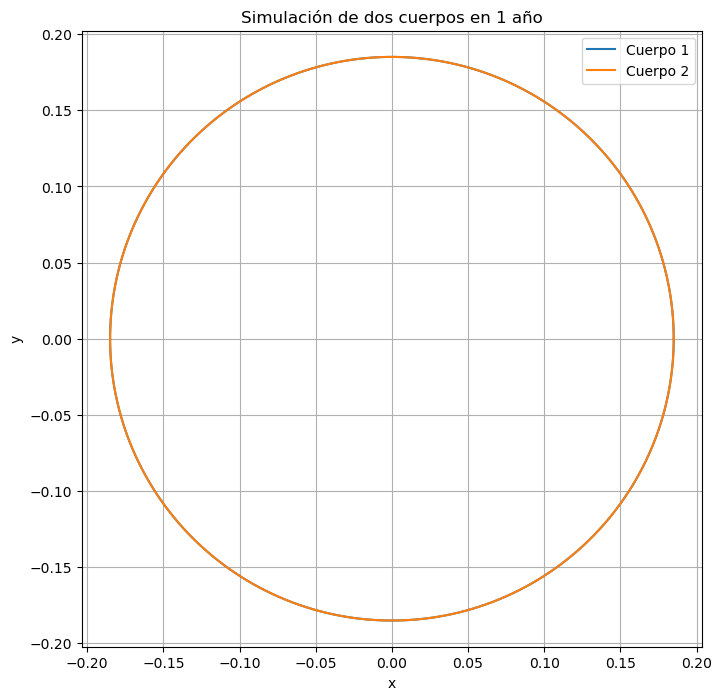

In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

# Crear la simulación y establecer la constante gravitacional (G = 1 en unidades arbitrarias)
sim = rebound.Simulation()
sim.G = 1.0

# Definir las masas (masas similares)
m1 = 1.0
m2 = 1.0

# Para que el período del movimiento relativo sea de 1 año:
# T = 2*pi*sqrt(a_rel^3/(m1+m2)) = 1  =>  a_rel^3 = 1/(2*pi^2)
a_rel = (1.0 / (2 * np.pi**2))**(1/3)

# Cada cuerpo orbita a una distancia r del centro de masas:
r = a_rel / 2.0

# Velocidad orbital para órbita circular: v = sqrt(G/(4r)) (para cuerpos de igual masa)
v = np.sqrt(1.0 / (4 * r))

# Agregar las partículas con condiciones iniciales:
# Se colocan simétricamente respecto al origen.
# Cuerpo 1: posición (-r, 0) y velocidad perpendicular (0, -v)
# Cuerpo 2: posición (r, 0) y velocidad (0, v)
sim.add(m=m1, x=-r, y=0, z=0, vx=0, vy=-v, vz=0)
sim.add(m=m2, x=r, y=0, z=0, vx=0, vy=v, vz=0)

# Tras agregar las partículas, mover el sistema al centro de masas (opcional pero recomendable)
sim.move_to_com()

# Configurar el integrador (se usa "ias15" por su alta precisión)
sim.integrator = "ias15"
# Podemos definir un dt (aunque con "ias15" no es estrictamente necesario)
sim.dt = 0.001

# Definir el tiempo final de la simulación: 1 año (equivalente a 365 días en este sistema de unidades)
t_final = 1.0

# Crear un arreglo de tiempos para almacenar las posiciones (por ejemplo, 1000 puntos a lo largo del año)
n_outputs = 1000
times = np.linspace(0, t_final, n_outputs)

# Listas para almacenar las posiciones de cada cuerpo
x1, y1 = [], []
x2, y2 = [], []

# Integrar la simulación y almacenar las posiciones
for t in times:
    sim.integrate(t)
    x1.append(sim.particles[0].x)
    y1.append(sim.particles[0].y)
    x2.append(sim.particles[1].x)
    y2.append(sim.particles[1].y)

# Graficar las trayectorias
plt.figure(figsize=(8,8))
plt.plot(x1, y1, label="Cuerpo 1")
plt.plot(x2, y2, label="Cuerpo 2")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Simulación de dos cuerpos en 1 año")
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.show()
